In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import import_ipynb
import time
import BubbleChart

importing Jupyter notebook from BubbleChart.ipynb


# Reading the data

In [2]:
start_time = time.time()
title = pd.read_csv('rodri_title_final_inner.tsv', sep='\t',low_memory=False)
print("--- %s seconds ---" % (time.time() - start_time))
print(len(title))


--- 10.874219179153442 seconds ---
3075473


In [3]:
print(len(title))
title = title[(title.genres != "\\N")]
print(len(title))
title = title[(title.genres != "Adult")]
print(len(title))

3075473
3029754
3029647


# Genres Frequencies

### Counting all genres (unique and mixed)

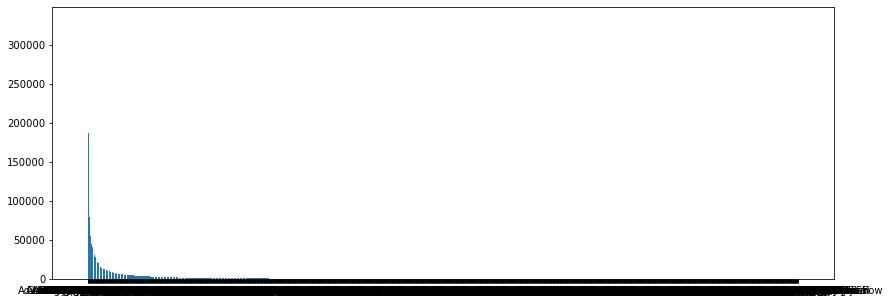

In [27]:
count = pd.DataFrame(title["genres"].value_counts());count

height = count["genres"].values
bars = count["genres"].keys()
y_pos = np.arange(len(count))

plt.rcParams['figure.figsize'] = [14, 5]

# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.show()

### Making an only genres dataframe to count their frequencies

In [28]:
genres = pd.DataFrame(title["genres"]) # == title.genres
count = pd.DataFrame(title["genres"].value_counts());count

,genres
Drama,331981
Comedy,187182
Documentary,156901
"Drama,Romance",86870
"Comedy,Drama",78881
...,...
"Horror,Musical,Romance",1
"Documentary,Romance,Sci-Fi",1
"Action,Reality-TV,War",1
"Adventure,Comedy,News",1


## Counting frequencies from the genres dataframe

In [ ]:
genres_frequency = {}
for i in genres.values:
    film_genres = i[0].split(",")
    for item in film_genres:
        if item in genres_frequency:
            # incrementing the counr
            genres_frequency[item] += 1
        else:
            # initializing the count
            genres_frequency[item] = 1

In [162]:
genres_frequency

{'Documentary': 312177,
 'Short': 351225,
 'Animation': 217634,
 'Comedy': 832575,
 'Romance': 349092,
 'Sport': 46874,
 'News': 9868,
 'Drama': 1338571,
 'Fantasy': 144364,
 'Horror': 224381,
 'Biography': 100616,
 'Music': 84670,
 'War': 71150,
 'Crime': 332246,
 'Western': 59133,
 'Family': 179679,
 'Adventure': 318574,
 'Action': 408556,
 'History': 96947,
 'Mystery': 159786,
 'Sci-Fi': 116407,
 'Musical': 52137,
 'Thriller': 271966,
 'Film-Noir': 14871,
 'Game-Show': 10967,
 'Talk-Show': 12104,
 'Reality-TV': 32006,
 'Adult': 297}

## Counting frequencies from the titles dataframe

In [4]:
genres_frequency = {}
for i in title.genres.values:
    film_genres = i.split(",")
    for item in film_genres:
        if item in genres_frequency:
            # incrementing the counr
            genres_frequency[item] += 1
        else:
            # initializing the count
            genres_frequency[item] = 1

In [5]:
genres_frequency

{'Documentary': 312177,
 'Short': 351225,
 'Animation': 217634,
 'Comedy': 832575,
 'Romance': 349092,
 'Sport': 46874,
 'News': 9868,
 'Drama': 1338571,
 'Fantasy': 144364,
 'Horror': 224381,
 'Biography': 100616,
 'Music': 84670,
 'War': 71150,
 'Crime': 332246,
 'Western': 59133,
 'Family': 179679,
 'Adventure': 318574,
 'Action': 408556,
 'History': 96947,
 'Mystery': 159786,
 'Sci-Fi': 116407,
 'Musical': 52137,
 'Thriller': 271966,
 'Film-Noir': 14871,
 'Game-Show': 10967,
 'Talk-Show': 12104,
 'Reality-TV': 32006,
 'Adult': 297}

In [280]:
genres_frequency.to_csv('genres_frequency.csv',sep=",")

AttributeError: 'dict' object has no attribute 'to_csv'

In [290]:
genres_frequency_Series = pd.Series()
genres_frequency_Series["data"] = list(genres_frequency.values())
genres_frequency_Series["labels"] = list(genres_frequency.keys())
genres_frequency_Series.to_csv('genres_frequency_Series.csv',sep=",")
genres_frequency_Series

/var/folders/bk/y0g661w92fl2j_dxj20n5bch0000gn/T/ipykernel_9582/2008886426.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  genres_frequency_Series = pd.Series()


data      [312177, 351225, 217634, 832575, 349092, 46874...
labels    [Documentary, Short, Animation, Comedy, Romanc...
dtype: object

## Ploting genres Frequency data

### As bar plot

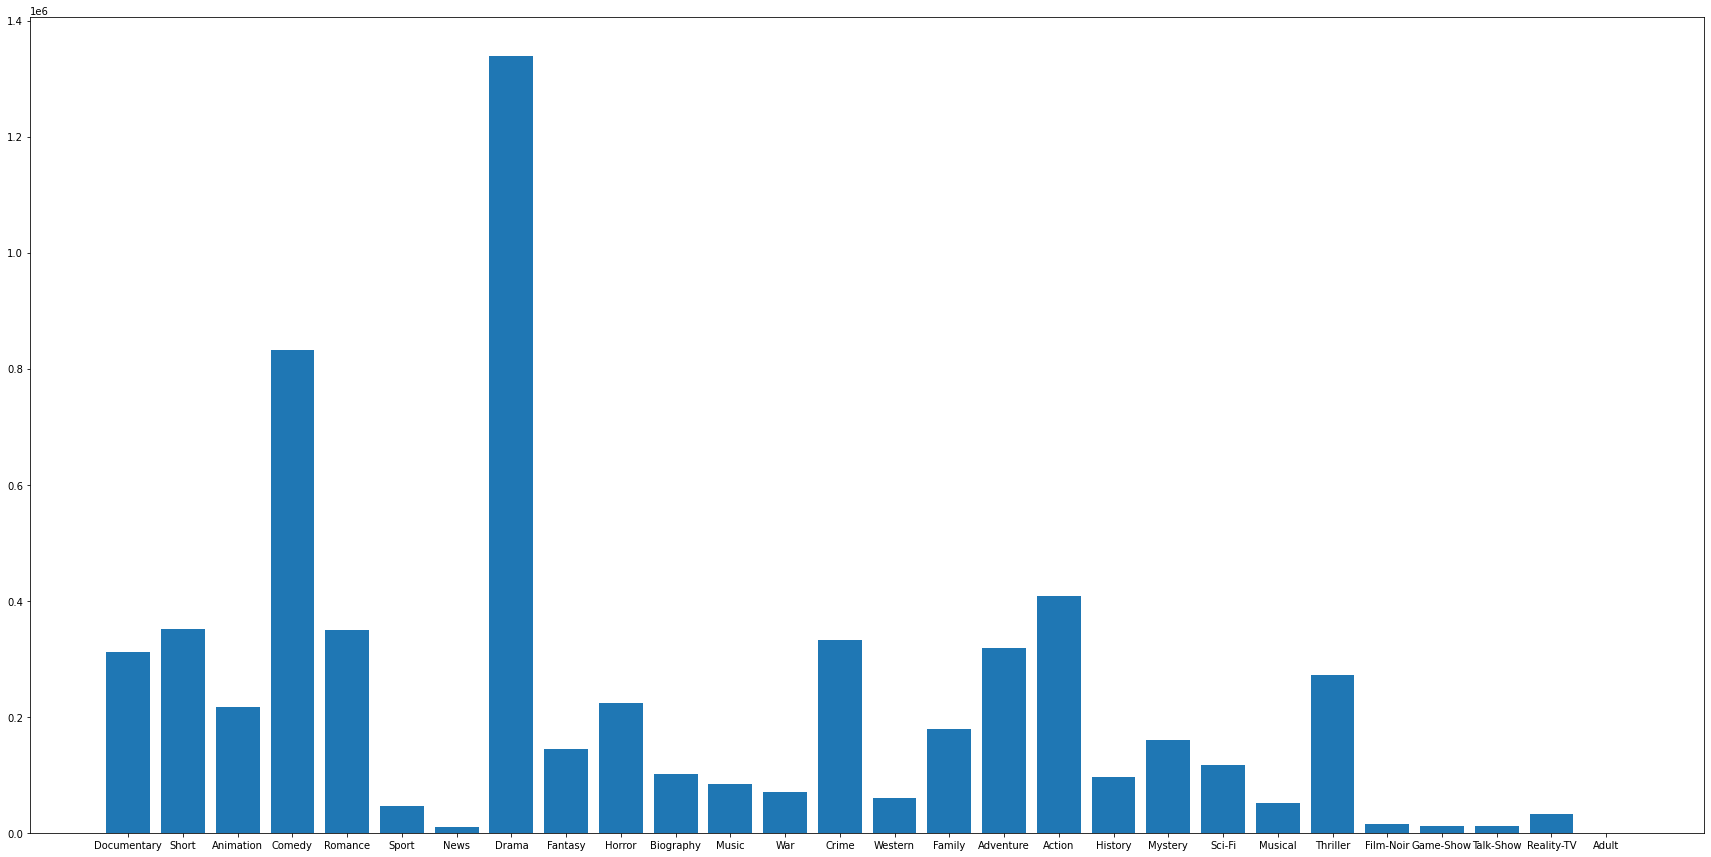

In [35]:
height = list(genres_frequency.values())
bars = list(genres_frequency.keys())
y_pos = np.arange(len(genres_frequency))

plt.rcParams['figure.figsize'] = [30, 15]

# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.show()

### As packed bubble chart

In [6]:
data = {
    'bigrams': list(genres_frequency.keys()),

    'frequency': list(genres_frequency.values()),

    'color': ['#5A69AF', '#579E65', '#F9C784', '#FC944A',
              '#F24C00', '#00B825', '#FC944A', '#EF4026',
              'goldenrod','green', '#F9C784', '#FC944A',
              'coral','#5A69AF', '#579E65', '#F9C784', '#FC944A',
              '#F24C00', '#00B825', '#FC944A', '#EF4026',
              'goldenrod','green', '#F9C784', '#FC944A',
              'coral', '#579E65', '#F9C784', '#FC944A',
              '#F24C00', '#00B825']
}

In [7]:
class BubbleChart:
    import numpy as np
    def __init__(self, area, bubble_spacing=0):
        """
        Setup for bubble collapse.

        Parameters
        ----------
        area : array-like
            Area of the bubbles.
        bubble_spacing : float, default: 0
            Minimal spacing between bubbles after collapsing.

        Notes
        -----
        If "area" is sorted, the results might look weird.
        """
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - \
            bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        idx_min = np.argmin(distance)
        return idx_min if type(idx_min) == np.ndarray else [idx_min]

    def collapse(self, n_iterations=50):
        """
        Move bubbles to the center of mass.

        Parameters
        ----------
        n_iterations : int, default: 50
            Number of moves to perform.
        """
        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                # try to move directly towards the center of mass
                # direction vector from bubble to the center of mass
                dir_vec = self.com - self.bubbles[i, :2]

                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                # check whether new bubble collides with other bubbles
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        # calculate direction vector
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        # test which direction to go
                        new_point1 = (self.bubbles[i, :2] + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                      self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):
        """
        Draw the bubble plot.

        Parameters
        ----------
        ax : matplotlib.axes.Axes
        labels : list
            Labels of the bubbles.
        colors : list
            Colors of the bubbles.
        """
        for i in range(len(self.bubbles)):
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i])
            ax.add_patch(circ)
            ax.text(*self.bubbles[i, :2], labels[i],
                    horizontalalignment='center', verticalalignment='center')

In [8]:
bubble_chart = BubbleChart(area=data['frequency'],
                           bubble_spacing=2)
bubble_chart.collapse()


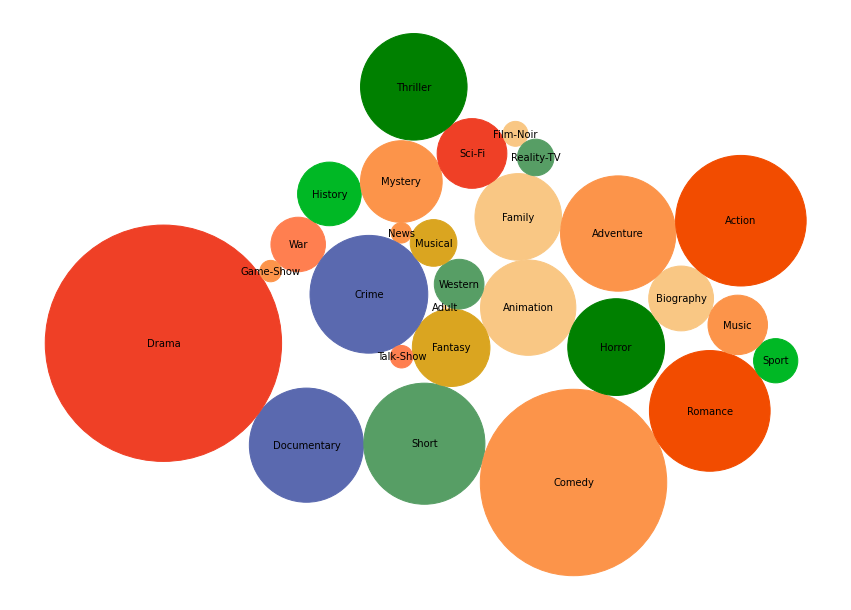

In [9]:
fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
fig.set_size_inches(15, 15, forward=True)
bubble_chart.plot(
    ax, data['bigrams'], data['color'])
ax.axis("off")
ax.relim()
ax.autoscale_view()
plt.show()

# Average Genres' ratings

In [17]:
title2 = title.reset_index();title2
title2.numVotes[1]

1879

In [18]:
genres_ratings = pd.Series()
for i in np.arange(len(title2)):
    film_genres = title2.loc[i].genres.split(",")
    for item in film_genres:
        if item in genres_ratings:
            genres_ratings[item].append(title2["averageRating"][i])
        elif item not in genres_ratings:
            genres_ratings[item] = [title2["averageRating"][i]]
        else:
            print("error")
genres_ratings

/var/folders/bk/y0g661w92fl2j_dxj20n5bch0000gn/T/ipykernel_4381/2657477852.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  genres_ratings = pd.Series()


Documentary    [5.7, 5.7, 5.7, 5.7, 5.7, 5.7, 5.7, 5.7, 5.4, ...
Short          [5.7, 5.7, 5.7, 5.7, 5.7, 5.7, 5.7, 5.7, 5.9, ...
Animation      [5.9, 5.9, 5.9, 5.9, 5.9, 5.9, 5.9, 5.9, 6.5, ...
Comedy         [6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, ...
Romance        [6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, ...
Sport          [5.4, 5.4, 5.4, 5.4, 5.4, 5.4, 5.4, 5.4, 5.4, ...
News           [4.3, 4.3, 4.3, 4.3, 4.3, 4.2, 4.2, 4.7, 4.7, ...
Drama          [4.4, 4.4, 4.4, 4.5, 4.5, 4.5, 4.5, 4.4, 4.4, ...
Fantasy        [5.6, 5.6, 5.6, 4.5, 4.5, 4.5, 4.4, 4.4, 4.4, ...
Horror         [6.3, 6.3, 6.3, 6.3, 6.3, 6.3, 6.3, 6.3, 6.3, ...
Biography      [5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, ...
Music          [4.7, 4.7, 6.8, 6.8, 6.8, 6.8, 6.8, 6.8, 6.8, ...
War            [4.9, 4.9, 4.2, 4.2, 4.4, 4.4, 4.6, 4.6, 4.6, ...
Crime          [4.6, 4.6, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, ...
Western        [4.9, 4.9, 4.9, 6.3, 6.3, 6.6, 6.6, 6.9, 6.9, ...
Family         [5.2, 5.2,

In [245]:
genres_ratings.to_csv("genres_ratings.csv")

In [ ]:
genres_ratings_pon.to_csv("genres_ratings_pon.csv")

In [301]:
mean_genres_ratings = {}
for i in np.arange(len(genres_ratings)):
    mean_genres_ratings[genres_ratings.keys()[i]] = round(np.mean(genres_ratings[i]),2)
mean_genres_ratings_sorted = dict(sorted(mean_genres_ratings.items(), key=lambda item: item[1],reverse=True))

In [302]:
print(list(mean_genres_ratings_sorted.values()))
print(list(mean_genres_ratings_sorted.keys()))
mean_genres_ratings_Series = pd.Series()
mean_genres_ratings_Series["labels"] = list(mean_genres_ratings_sorted.keys())
mean_genres_ratings_Series["data"] = list(mean_genres_ratings_sorted.values())
mean_genres_ratings_Series.to_csv("mean_genres_ratings_Series.csv")
mean_genres_ratings_Series

[7.09, 6.93, 6.92, 6.84, 6.8, 6.73, 6.67, 6.64, 6.61, 6.5, 6.43, 6.38, 6.35, 6.35, 6.33, 6.33, 6.33, 6.31, 6.29, 6.28, 6.27, 6.19, 6.11, 6.08, 5.89, 5.83, 5.62, 5.45]
['Documentary', 'Biography', 'History', 'Music', 'Film-Noir', 'Short', 'Animation', 'Sport', 'War', 'Drama', 'Family', 'Musical', 'Romance', 'Crime', 'News', 'Fantasy', 'Talk-Show', 'Mystery', 'Adventure', 'Comedy', 'Reality-TV', 'Game-Show', 'Western', 'Action', 'Sci-Fi', 'Thriller', 'Adult', 'Horror']


/var/folders/bk/y0g661w92fl2j_dxj20n5bch0000gn/T/ipykernel_9582/3822409924.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  mean_genres_ratings_Series = pd.Series()


labels    [Documentary, Biography, History, Music, Film-...
data      [7.09, 6.93, 6.92, 6.84, 6.8, 6.73, 6.67, 6.64...
dtype: object

In [308]:
list(mean_genres_ratings_sorted.keys())

['Documentary',
 'Biography',
 'History',
 'Music',
 'Film-Noir',
 'Short',
 'Animation',
 'Sport',
 'War',
 'Drama',
 'Family',
 'Musical',
 'Romance',
 'Crime',
 'News',
 'Fantasy',
 'Talk-Show',
 'Mystery',
 'Adventure',
 'Comedy',
 'Reality-TV',
 'Game-Show',
 'Western',
 'Action',
 'Sci-Fi',
 'Thriller',
 'Adult',
 'Horror']

In [320]:

labels = list(mean_genres_ratings_sorted.keys())
y_pos = np.arange(len(mean_genres_ratings_sorted))
data = list(mean_genres_ratings_sorted.values())

ax.barh(y_pos, data, align='center')
ax.set_yticks(y_pos, labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Average Rating')
ax.set_title('How fast do you want to go today?')

plt.show()

TypeError: set_ticks() takes 2 positional arguments but 3 were given

AttributeError: 'list' object has no attribute 'values'